In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('abusive.csv', encoding='latin1')
alay_dict = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin1')

df.head()
# alay_dict.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [8]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


Tweet            HS  \
count                                               13169  13169.000000   
unique                                              13023           NaN   
top     USER USER USER USER USER USER USER USER USER U...           NaN   
freq                                                    9           NaN   
mean                                                  NaN      0.422280   
std                                                   NaN      0.493941   
min                                                   NaN      0.000000   
25%                                                   NaN      0.000000   
50%                                                   NaN      0.000000   
75%                                                   NaN      1.000000   
max                                                   NaN      1.000000   

             Abusive  HS_Individual      HS_Group   HS_Religion       HS_Race  \
count   13169.000000   13169.000000  13169.000000  13169.000000  13169.000000   
unique           NaN            NaN           NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN           NaN   
mean        0.382945       0.271471      0.150809      0.060217      0.042980   
std         0.486123       0.444735      0.357876      0.237898      0.202819   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000      0.000000   
75%         1.000000       1.000000      0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000      1.000000   

         HS_Physical     HS_Gender      HS_Other       HS_Weak   HS_Moderate  \
count   13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.024527      0.023236      0.284000      0.256891      0.129471   
std         0.154685      0.150659      0.450954      0.436935      0.335733   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      1.000000      1.000000      0.000000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

           HS_Strong  
count   13169.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.035918  
std         0.186092  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [10]:
# Menghitung jumlah tweet yang digolongkan sebagai HS dan Abusive
hs_count = df['HS'].sum()
abusive_count = df['Abusive'].sum()

print(f'Total Hate Speech: {hs_count}')
print(f'Total Abusive: {abusive_count}')

Total Hate Speech: 5561
Total Abusive: 5043


In [59]:
import plotly.express as px
import plotly.graph_objects as go

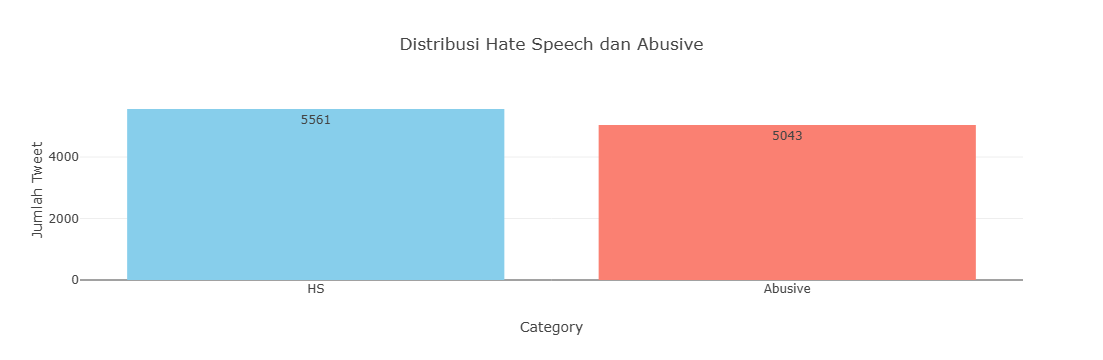

In [61]:
count_plot_data = df[['HS', 'Abusive']].sum().reset_index()
count_plot_data.columns = ['Category', 'Count']

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=count_plot_data['Category'], 
        y=count_plot_data['Count'], 
        text=count_plot_data['Count'], 
        textposition='inside', 
        marker_color=['skyblue', 'salmon']
    )
])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Distribusi Hate Speech dan Abusive',
    xaxis_title='Category',
    yaxis_title='Jumlah Tweet',
    xaxis_tickangle=0,
    showlegend=False
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/distribusi_hs_abusive_chart.html')

# Menampilkan grafik
fig.show()

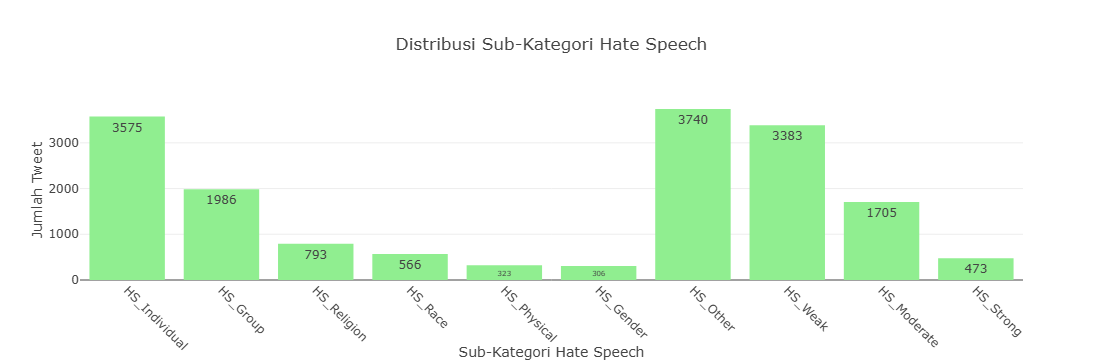

In [60]:
# Memfilter kolom yang diawali dengan 'HS_'
hs_subcategories = df.filter(like='HS_').sum().reset_index()
hs_subcategories.columns = ['Category', 'Count']

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=hs_subcategories['Category'], 
        y=hs_subcategories['Count'], 
        text=hs_subcategories['Count'], 
        textposition='inside', 
        marker_color='lightgreen'
    )
])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Distribusi Sub-Kategori Hate Speech',
    xaxis_title='Sub-Kategori Hate Speech',
    yaxis_title='Jumlah Tweet',
    xaxis_tickangle=45,
    showlegend=False
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/distribusi_subkategori_hs_chart.html')

# Menampilkan grafik
fig.show()

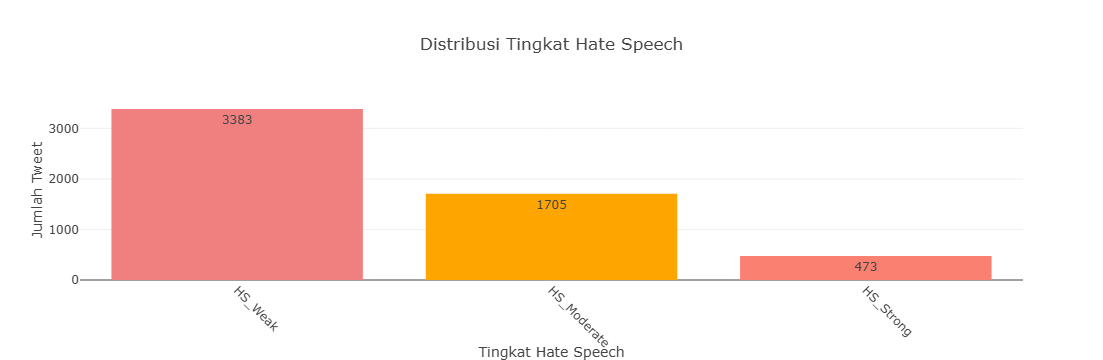

In [62]:
# Mengambil data untuk tingkat keparahan hate speech
severity_levels = df[['HS_Weak', 'HS_Moderate', 'HS_Strong']].sum().reset_index()
severity_levels.columns = ['Category', 'Count']

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=severity_levels['Category'], 
        y=severity_levels['Count'], 
        text=severity_levels['Count'], 
        textposition='inside', 
        marker_color=['lightcoral', 'orange', 'salmon']
    )
])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Distribusi Tingkat Hate Speech',
    xaxis_title='Tingkat Hate Speech',
    yaxis_title='Jumlah Tweet',
    xaxis_tickangle=45,
    showlegend=False
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/distribusi_tingkat_hs_chart.html')

# Menampilkan grafik
fig.show()

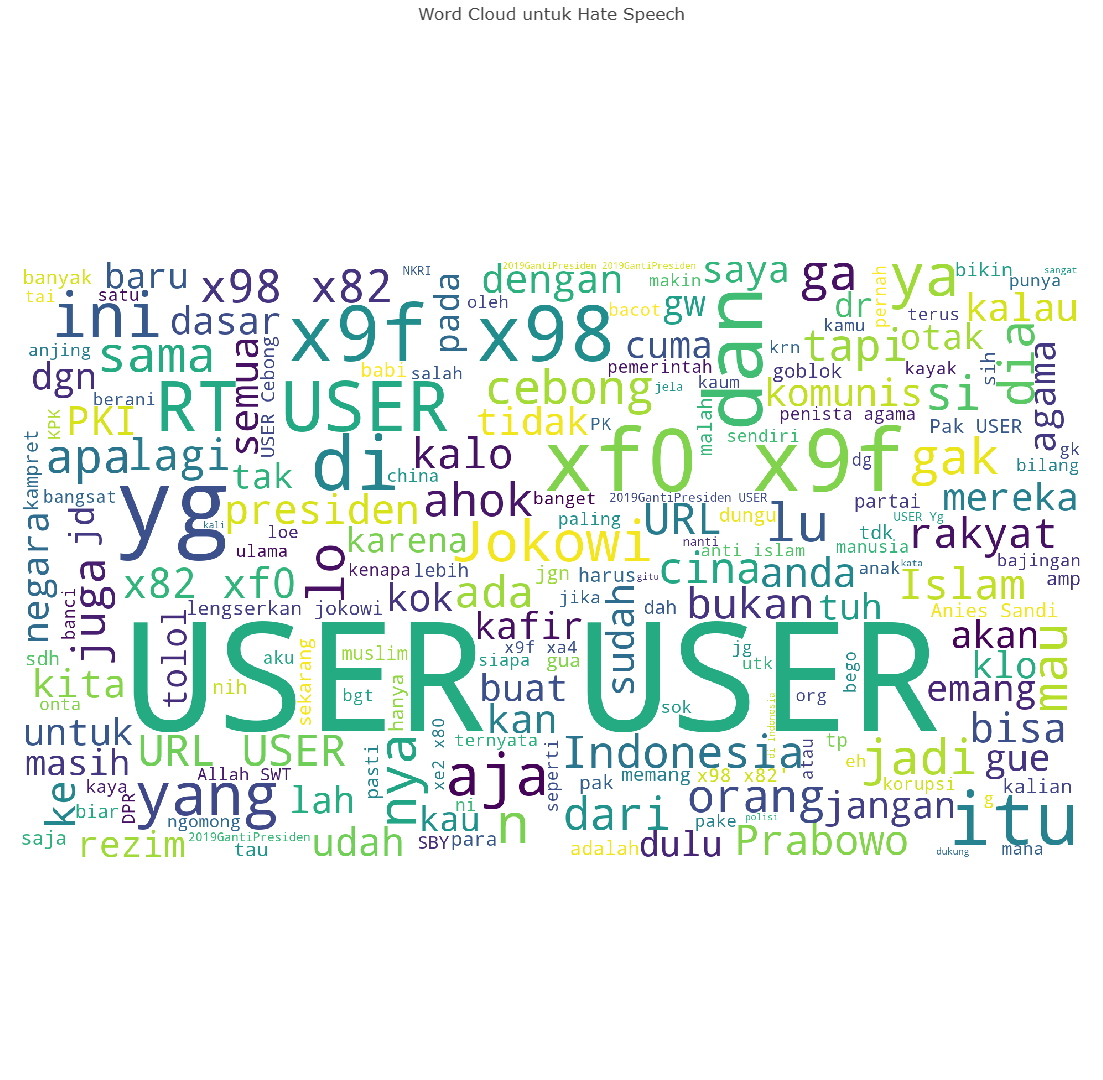

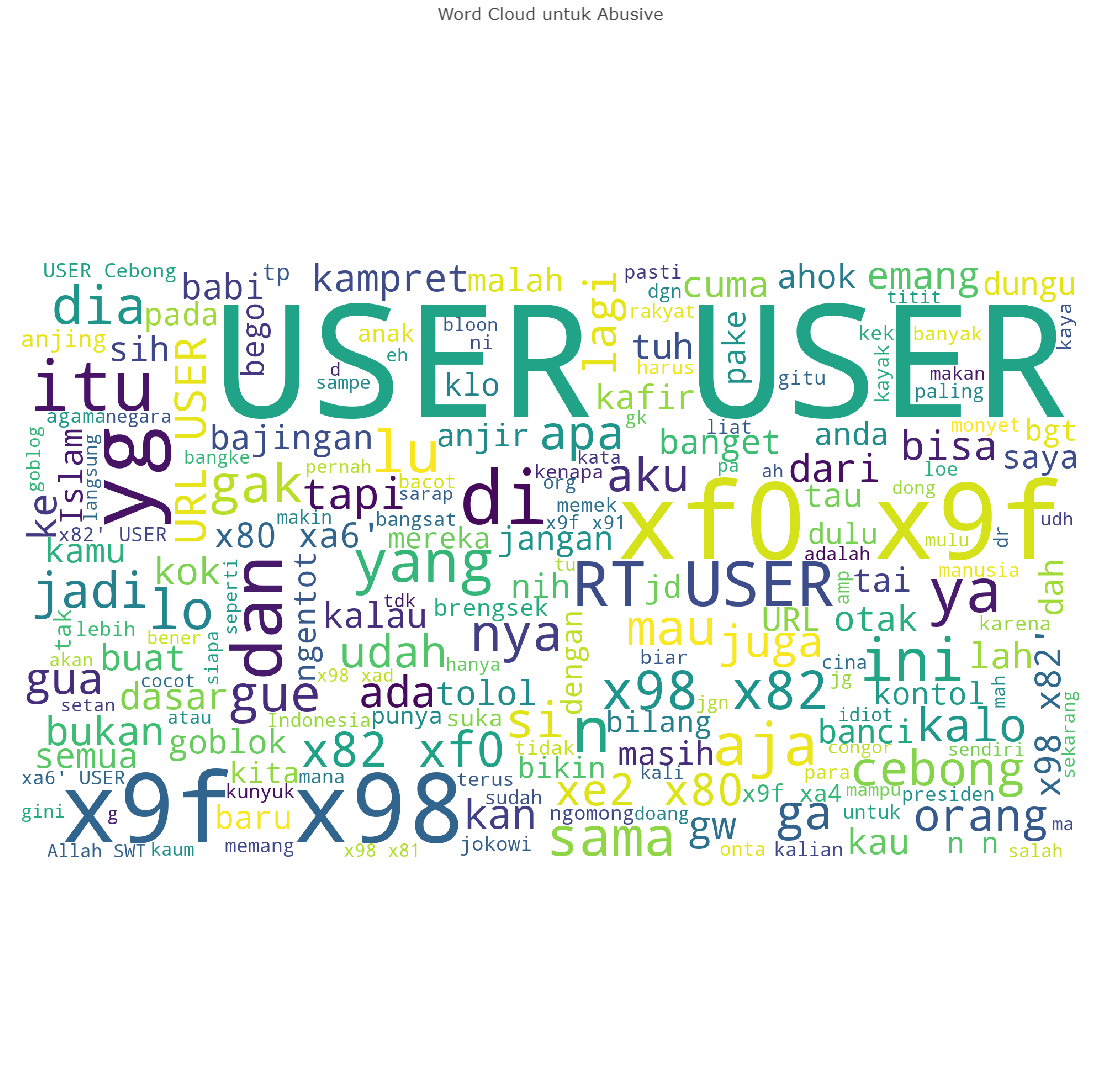

In [77]:
def generate_wordcloud(data, width=1920, height=1080):
    wordcloud = WordCloud(width=width, height=height, background_color='white').generate(' '.join(data))
    return wordcloud

def plot_wordcloud(data, title, filename, width=1920, height=1080):
    wc = generate_wordcloud(data, width, height)
    
    # Convert WordCloud to image
    img_buf = io.BytesIO()
    wc.to_image().save(img_buf, format='PNG')
    img_buf.seek(0)
    img = Image.open(img_buf)

    fig = px.imshow(img)
    fig.update_layout(
        title=title,
        margin=dict(l=0, r=0, t=40, b=0),
        title_x=0.5,
        width=width,
        height=height
    )
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)

    # Save plot as HTML
    fig.write_html(filename)
    fig.show()

# Membuat dan menyimpan word cloud sebagai HTML
plot_wordcloud(df[df['HS'] == 1]['Tweet'], 'Word Cloud untuk Hate Speech', 'static/wordcloud_hs.html', width=1920, height=1080)
plot_wordcloud(df[df['Abusive'] == 1]['Tweet'], 'Word Cloud untuk Abusive', 'static/wordcloud_abusive.html', width=1920, height=1080)

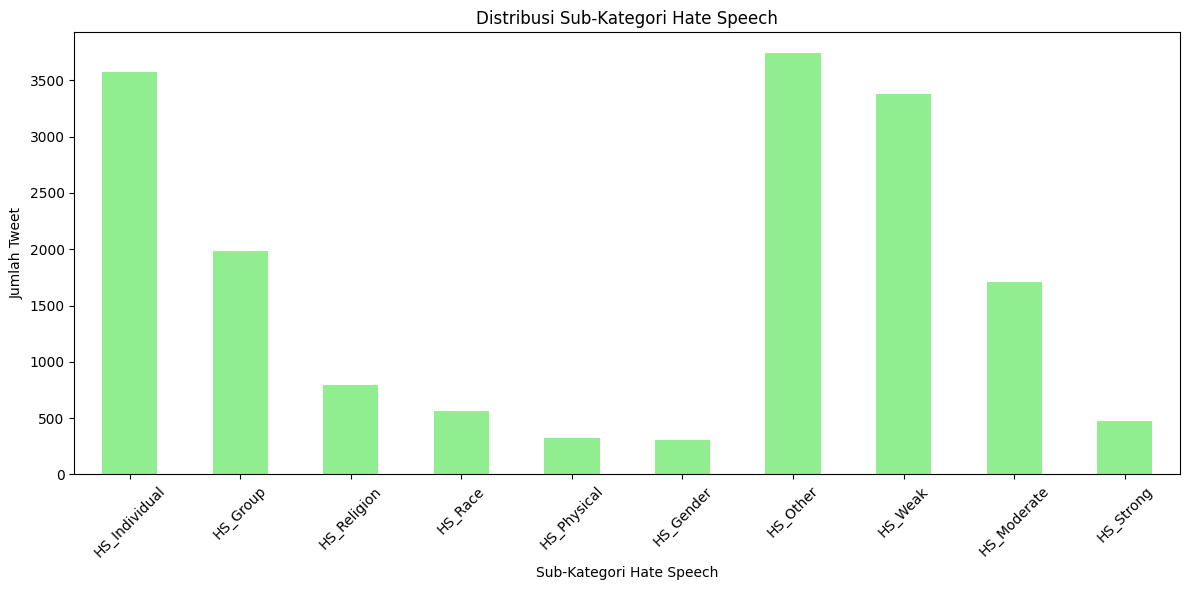

In [31]:
import matplotlib.pyplot as plt

# Menghitung jumlah tweet pada setiap sub-kategori HS
hs_subcategories = df.filter(like='HS_').sum()

# Membuat bar plot
plt.figure(figsize=(12,6))
hs_subcategories.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Sub-Kategori Hate Speech')
plt.xlabel('Sub-Kategori Hate Speech')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

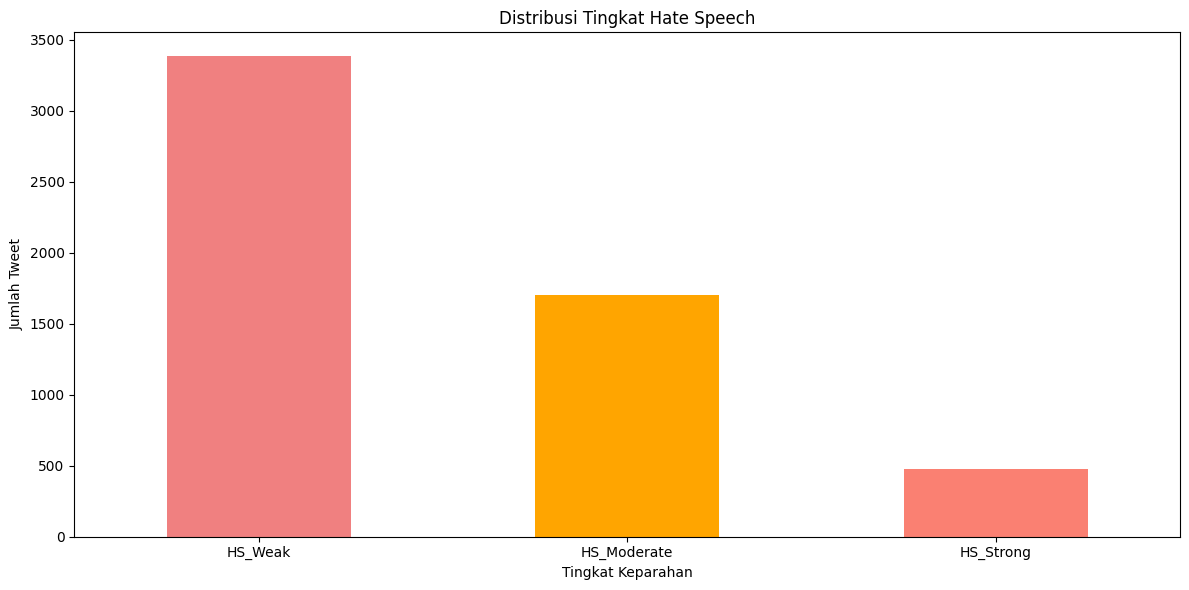

In [32]:
# Menghitung jumlah tweet pada setiap tingkat keparahan HS
severity_levels = df[['HS_Weak', 'HS_Moderate', 'HS_Strong']].sum()

# Membuat bar plot
plt.figure(figsize=(12,6))
severity_levels.plot(kind='bar', color=['lightcoral', 'orange', 'salmon'])
plt.title('Distribusi Tingkat Hate Speech')
plt.xlabel('Tingkat Keparahan')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
alay_dict.columns = ['original', 'slang']
alay_dict.head()

original                     slang
0  anakjakartaasikasik  anak jakarta asyik asyik
1         pakcikdahtua         pak cik sudah tua
2       pakcikmudalagi         pak cik muda lagi
3          t3tapjokowi              tetap jokowi
4                   3x                 tiga kali

In [34]:
from collections import Counter

# Menggabungkan semua tweet menjadi satu teks
all_text = ' '.join(df['Tweet'].astype(str))

# Membuat daftar kata dan menghitung frekuensinya
words = all_text.split()
counter_tweets = Counter(words)

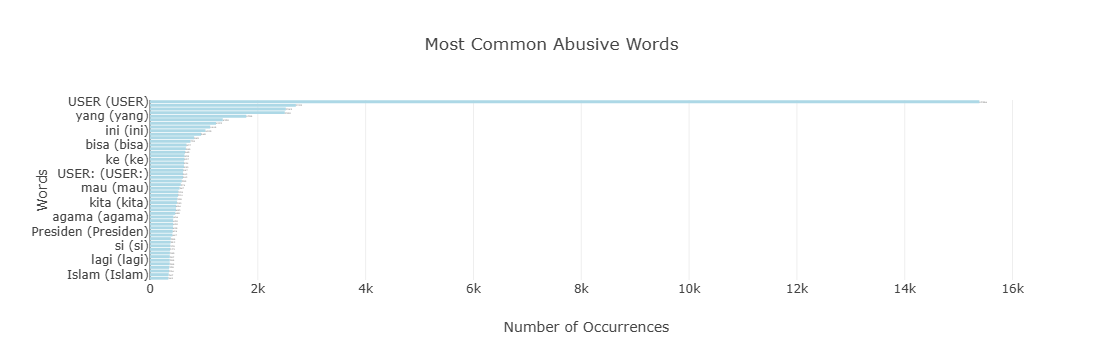

In [72]:
# Mengambil kolom pertama sebagai daftar tweets
tweets = df.iloc[:, 0].tolist()

# Menghitung frekuensi kata
word_list = " ".join(tweets).split()
counter_tweets = Counter(word_list)

# Mengambil 50 kata paling umum
top_tweets = OrderedDict(counter_tweets.most_common(50))

keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

# Mengidentifikasi kata asli dari kata alay
original_slang = [
    alay_dict.loc[alay_dict['slang'] == word, 'original'].values[0]
    if word in alay_dict['slang'].values
    else word
    for word in keys
]
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

# Membuat DataFrame untuk Plotly
plot_df = pd.DataFrame({
    'Words': combined_words,
    'Counts': vals
})

# Membuat grafik batang menggunakan Plotly
fig = go.Figure(data=[
    go.Bar(
        x=plot_df['Counts'],
        y=plot_df['Words'],
        text=plot_df['Counts'],
        textposition='auto',
        orientation='h',
        marker_color='lightblue'
    )
])

# Menambahkan judul dan label sumbu serta menyembunyikan legenda
fig.update_layout(
    title='Most Common Abusive Words',
    xaxis=dict(title='Number of Occurrences'),
    yaxis=dict(title='Words', autorange='reversed'),  # Reversed to match Seaborn's behavior of sorting by value
    showlegend=False,
    margin=dict(l=150)  # Adjust for long word labels
)

# Menyimpan grafik sebagai file HTML
fig.write_html('static/most_common_abusive_words.html')

# Menampilkan grafik
fig.show()

2024-07-07 09:31:49.858 
  command:

    streamlit run C:\Users\Mumtaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-07 09:31:50.083 
════════════════════════════════════════════════
deprecation.showPyplotGlobalUse IS NO LONGER SUPPORTED.

The support for global pyplot instances is planned to be removed soon.

Please update <user defined>.
════════════════════════════════════════════════



DeltaGenerator()

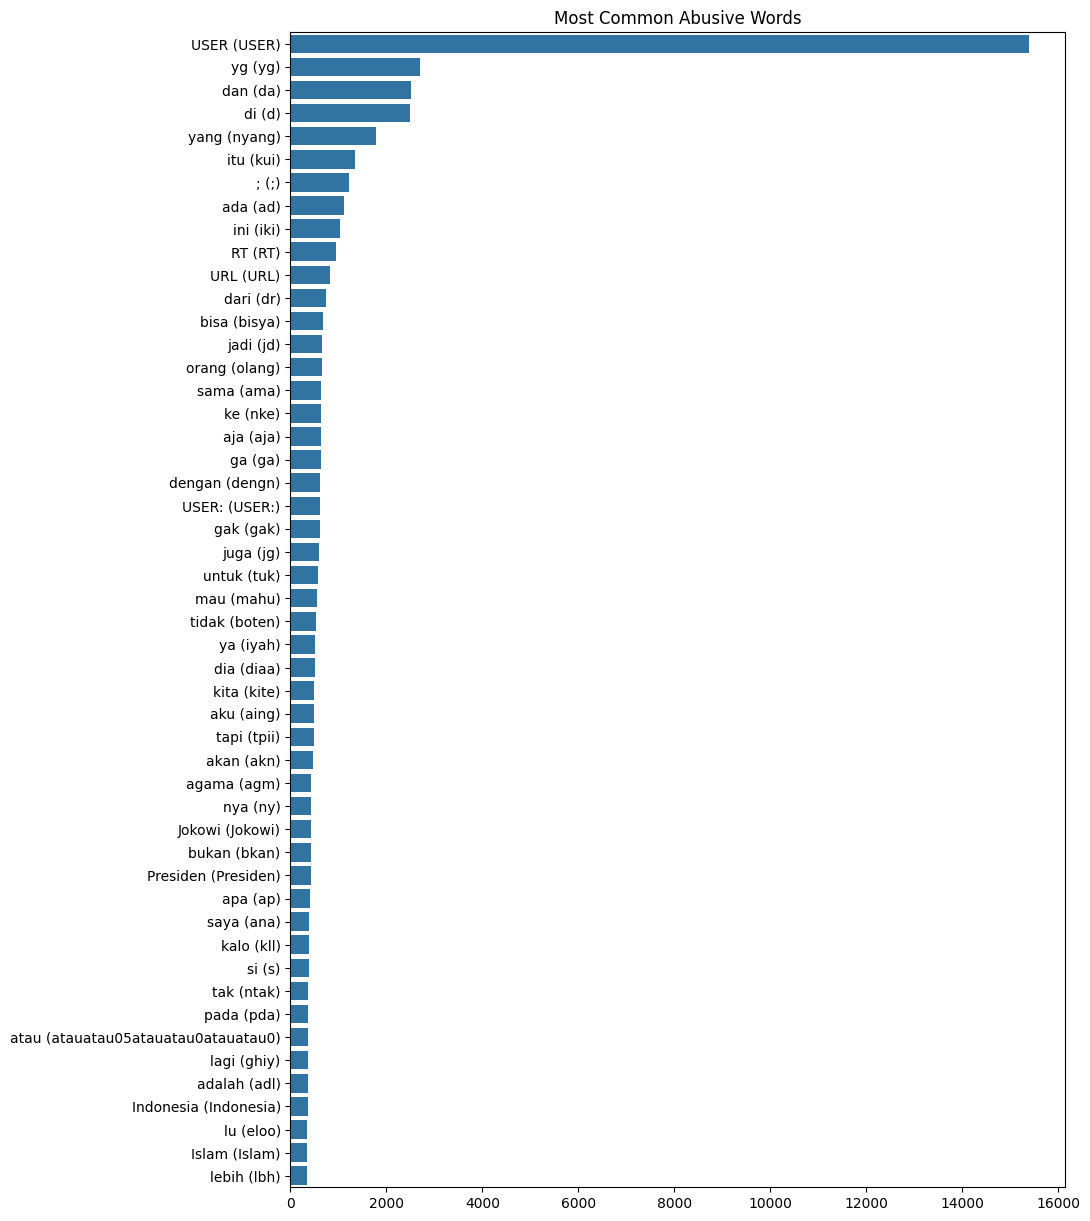

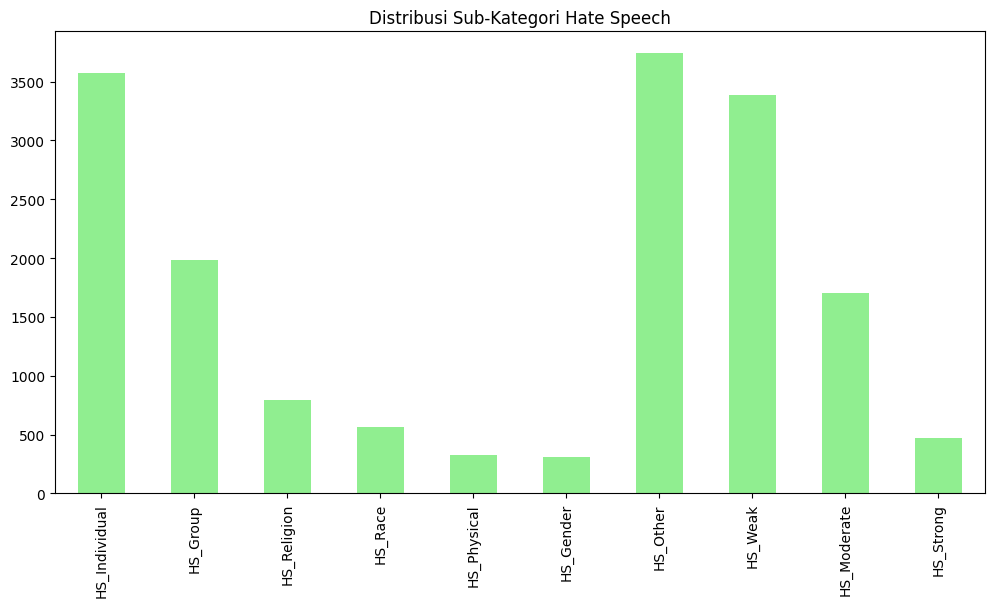

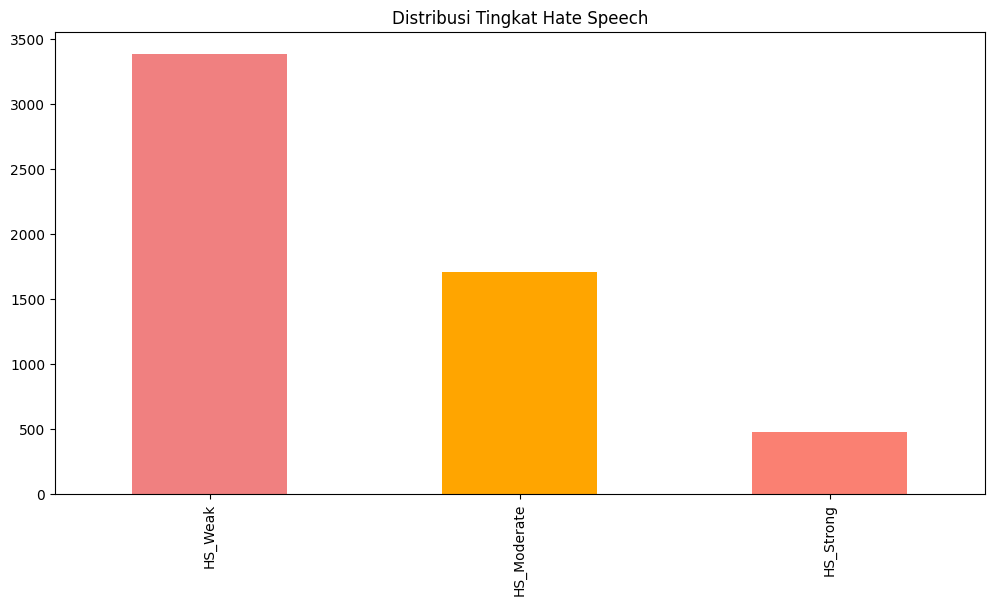

In [37]:
import pandas as pd
import streamlit as st

# Mengimpor dataset
df = pd.read_csv('abusive.csv', encoding='latin1')
alay_dict = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin1')

# Menamai kolom alay_dict
alay_dict.columns = ['original', 'slang']

# Streamlit Tampilkan Judul
st.title('Analisis Abusive Tweets')

# Menampilkan DataFrame
st.header('Data Sample dari abusive.csv')
st.write(df.head())

st.header('Data Sample dari new_kamusalay.csv')
st.write(alay_dict.head())

# Menggabungkan semua tweet menjadi satu teks
all_text = ' '.join(df['Tweet'].astype(str))

# Membuat daftar kata dan menghitung frekuensinya
words = all_text.split()
counter_tweets = Counter(words)

# OrderedDict dari counter_tweets dengan 50 kata paling umum
top_tweets = OrderedDict(counter_tweets.most_common(50))

keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

# Mengidentifikasi kata asli dari kata alay
original_slang = [alay_dict.loc[alay_dict['slang'] == word, 'original'].values[0] if word in alay_dict['slang'].values else word for word in keys]
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

# Visualisasi kata kasar yang paling sering muncul
st.header('Most Common Abusive Words')
st.set_option('deprecation.showPyplotGlobalUse', False)
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=vals[:50], y=combined_words[:50], ax=ax)
ax.set_title('Most Common Abusive Words')
st.pyplot(fig)

# Membandingkan Sub-Kategori HS dan Tingkat Keparahan HS

# Plot Distribusi Sub-Kategori HS
st.header('Distribusi Sub-Kategori Hate Speech')
hs_subcategories = df.filter(like='HS_').sum()
fig, ax = plt.subplots(figsize=(12, 6))
hs_subcategories.plot(kind='bar', color='lightgreen', ax=ax)
ax.set_title('Distribusi Sub-Kategori Hate Speech')
st.pyplot(fig)

# Plot Distribusi Tingkat Keparahan HS
st.header('Distribusi Tingkat Hate Speech')
severity_levels = df[['HS_Weak', 'HS_Moderate', 'HS_Strong']].sum()
fig, ax = plt.subplots(figsize=(12, 6))
severity_levels.plot(kind='bar', color=['lightcoral', 'orange', 'salmon'], ax=ax)
ax.set_title('Distribusi Tingkat Hate Speech')
st.pyplot(fig)